## Crime Project 

This assignment focuses on real data collected from data.police.uk on crimes reported across Northern Ireland in February 2023 and includes NI ward data collected from OSNI Open Data.

<b>Overview</b> 

This script will show the user how to: 
 - load data
 - explore data
 - transform csv file into a shapefile
 - create lists and a bar graph from the lists
 - plot datasets 
 - create a spatial join
 - create a choropleth map
 - create an interactive map 
 - create a scatter graph with a line of best fit 
 
The overall aim is to be able to explore the crime data within Northern Ireland in different ways. Further development from this script can involve hot spot analysis, creating different charts such as pie charts to visualise crime types, and creating various maps from the data.

Run the following cell by clicking the shift key + enter key, and this will install all modules needed to run the script

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import seaborn as sns
from shapely.geometry import Point

The next step is to load in the crime data for the script. Again, to run each cell click shift key + enter key

In [ ]:
crime = gpd.read_file("data_files/NI_crime_feb_23.csv")
crime.crs = 'epsg:4326'  # sets point crs for crime data
print(crime.head())  # displays first 5 rows of crime data 

From the above cell, you can see that there are 12264 rows, indicating that there were 12264 crimes reported across Northern Ireland in February 2023. You can also get the number of crimes reported by entering the following cell.

In [ ]:
print(crime['Crime ID'].count())  # counts the number of crimes reported

The dataset can also be evaluated using .describe(), which provides details of the total number of crimes committed, the most recurring crime and how many times that particular crime has been reported. For this dataset it shows that Violence and sexual offences are the most reported and have been reported 4052 times in February.

In [ ]:
crime['Crime type'].describe()  # describes dataframe

You can also look at individual or a specific set of rows within a dataset by using an index, '.loc'

In [ ]:
print(crime.loc[1])  # search row 1 of dataset 

You can also further examine the dataset with different statements to find out specific information. For example, the cell below should return all crimes reported that have a 'Crime type' of 'Anti-social behaviour. The number of rows should be 3452. 

Also, by adding in 'Crime type' at the end of our script line, this will only show the 'Crime type' column, instead of all 13. 

In [ ]:
print(crime.loc[crime['Crime type'] == 'Anti-social behaviour', 'Crime type'])

Each crime type can be organised into their own dataframe by defining the code and giving the dataframe a name. The first example is below.

In [ ]:
ASB_crime = crime.loc[crime['Crime type'] == 'Anti-social behaviour', 'Crime type']

print (ASB_crime)
print (ASB_crime.count())  # counts total number of times ASB crime has been reported

You can now do this for the remaining 13 crime types. and find the amount of times each crime has been reported by using the .count() method.

In [ ]:
shoplifting_crime = crime.loc[crime['Crime type'] == 'Shoplifting', 'Crime type']
violence_sexual = crime.loc[crime['Crime type'] == 'Violence and sexual offences', 'Crime type']
crimdamage_arson = crime.loc[crime['Crime type'] == 'Criminal damage and arson', 'Crime type']
other_theft = crime.loc[crime['Crime type'] == 'Other theft', 'Crime type']
drugs_crime = crime.loc[crime['Crime type'] == 'Drugs', 'Crime type']
burglary_crime = crime.loc[crime['Crime type'] == 'Burglary', 'Crime type']
other_crime = crime.loc[crime['Crime type'] == 'Other crime', 'Crime type']
vehicle_crime = crime.loc[crime['Crime type'] == 'Vehicle crime', 'Crime type']
poss_weapons = crime.loc[crime['Crime type'] == 'Possessions of weapons', 'Crime type']
public_order = crime.loc[crime['Crime type'] == 'Public order', 'Crime type']
robbery_crime = crime.loc[crime['Crime type'] == 'Robbery', 'Crime type']
bicycle_theft = crime.loc[crime['Crime type'] == 'Bicycle theft', 'Crime type']
theft_from = crime.loc[crime['Crime type'] == 'Theft from the person', 'Crime type']

print(shoplifting_crime.count())
print(violence_sexual.count()) 
print(crimdamage_arson.count())
print(other_theft.count())
print(drugs_crime.count())
print(burglary_crime.count())
print(other_crime.count())
print(vehicle_crime.count())
print(poss_weapons.count())
print(public_order.count())
print(robbery_crime.count())
print(bicycle_theft.count())
print(theft_from.count())


The data can also be analysed by using matplotlib to create a bar graph showing the most common type of crime reported. This will be done with using the above data. The next stage is capturing the dataset as lists. Run the cell below to create the lists. 

In [ ]:
crimetype = ['Violence_sexual_offences', 'Criminal_damage_arson', 'Other_theft', 
             'Shoplifting', 'Drugs', 'Burglary', 'Other_crime', 'Vehicle_crime',
             'Possession_of_weapons', 'Public order', 'Robbery', 'Bicycle_theft',
             'Theft_person', 'Anti-social_behaviour']  # creates list for types of crime

crimecount = [4052, 1310, 1007, 705, 697, 309, 282, 193, 0, 55, 46, 36, 26, 3452]  

# creates list for number of reported crimes for each type of crime

Now the bar chart can be created by running the code below.

In [ ]:
plt.bar(crimetype, crimecount)
plt.title('Number of different crimes reported')
plt.xlabel('Crime type')
plt.ylabel('Times reported')
plt.show()

Although the bar chart displays the data, the visual element is lost with the overlaping of the Crime type labels. This can be fixed by rotating the x axis. 

In [ ]:
# adapted from https://www.geeksforgeeks.org/bar-plot-in-matplotlib/

# define figure size
bar, ax = plt.subplots(figsize =(16, 9))
 
# horizontal bar plot
ax.barh(crimetype, crimecount)
 
# remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# remove x, y ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# show top values
ax.invert_yaxis()

# add Plot Title
ax.set_title('Number of different crimes reported',
             loc ='left', )
 
# Show Plot
plt.show()

This graph shows a much clearer result, with the highest reported crime being Violence and sexual offences and the least reported being theft from a person, and 0 reports of possession of weapons. 

For the next element of this script, the csv file of crime rates will be saved as a shapefile using shapely.geometry 

Run the next cell to load the data and print a subset of the data frame.

In [ ]:
df = pd.read_csv('data_files/NI_crime_feb_23.csv')  # loads point data

print(df.head())  # prints initial subset of dataframe

As you can see from the above cell, the dataframe has more columns than we need. We can tidy this up by running the next cell, which will drop specific columns. 

In [ ]:
df = df.drop(columns=['Crime ID', 'Falls within', 'LSOA code', 'LSOA name', 'Last outcome category', 'Context'])
# drops colums from dataset 

print(df.head())  # shows initial 5 rows of dataset

Now the dataframe consists only of the month the crime was reported, who it was reported by, the latitude and longitude points of the data, the location of the crime and the crime type. 

From this dataframe we will now define the geometry to begin the process of changing the csv file into a shapefile. 

In [ ]:
# add a geometry column from the longitude and latitude coordinates for each crime reported

df['geometry'] = list(zip(df['Longitude'], df['Latitude']))
df['geometry'] = df['geometry'].apply(Point)
print(df)

Again, you can tidy up the dataframe by removing the columns we no longer need, however this will be left as is for now.

A new GeoDataFrame can now be created from the Dataframe, using the EPSG code which represents WGS84 Lat/Lon. 

In [ ]:
gdf = gpd.GeoDataFrame(df)  # loads dataframe as gdf
gdf.set_crs("EPSG:4326", inplace=True)  # sets the coordinates reference system
print(gdf)

Now it is time to save the GeoDataFrame as a shapefile, which you can then load onto a GIS software such as ArcGIS and analyse the data from there.

In [ ]:
gdf.to_file('data_files/NIcrimefeb.shp')  # saves gdf as a shapefile

Your shapefile should look similar to this once loaded into a GIS software. 

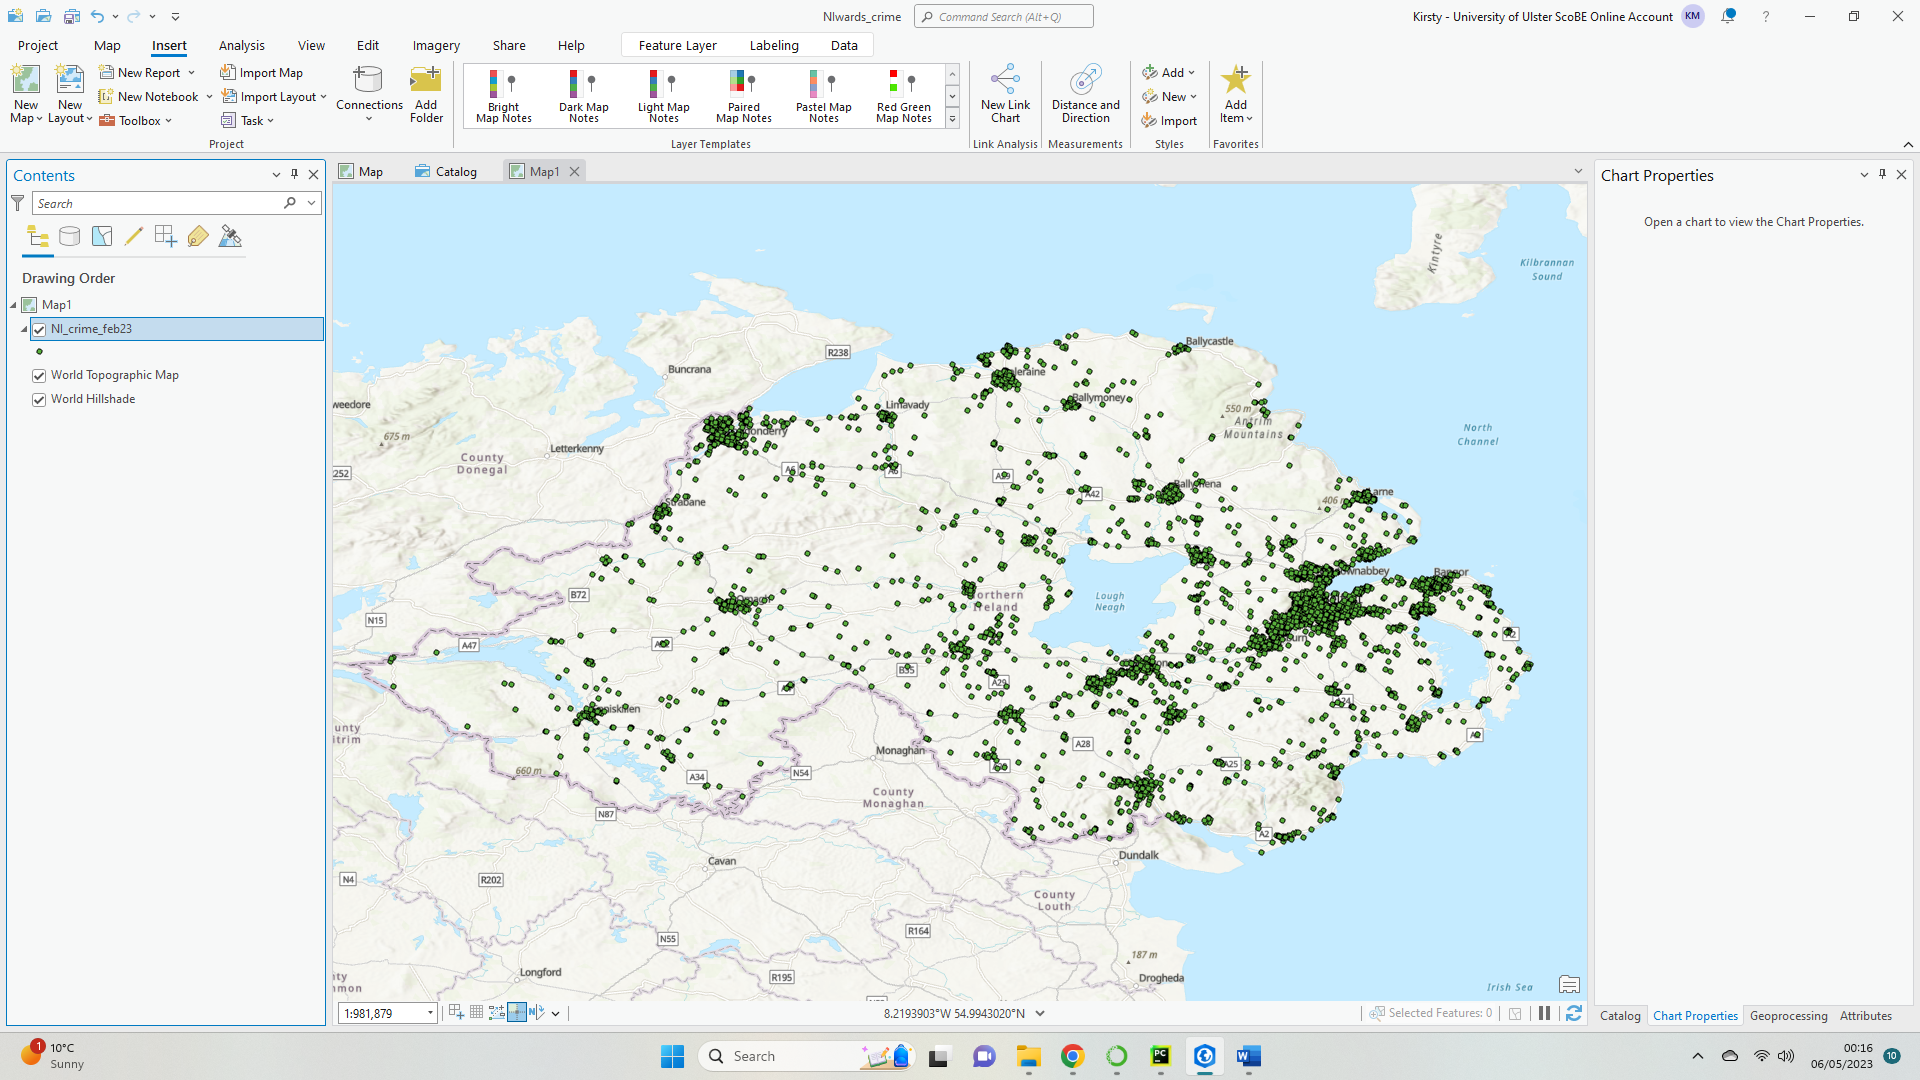

Now that the crime data has been changed to a shapefile, we can now begin to look at the Wards data for Northern Ireland and merge the two together to create a visual analysis. The first step is to load the wards data. Do this by running the cell below.

In [ ]:
wards = gpd.read_file('data_files/NI_wards.shp')  # load wards shapefile
wards.crs = 'epsg:4326'  # set wards crs
print(wards.head())  # display subset of wards data

print(wards['Ward'].count())  # counts the number of wards in the dataset

As well as looking at the data in a tabular format, you can also visualise it as a map. The below code will run to project the wards data as a map.

In [ ]:
wards.plot(figsize=(12,10))  # plots wards as a map

Now load in the new crime shapefile as 'crimes' so the two datasets can be joined and test if the two have the same crs code.

In [ ]:
crimes = gpd.read_file('data_files/NIcrimefeb.shp')  # load crimes shapefile

print(crimes.crs == wards.crs)  # test if crs of both datasets are the same

The crimes point data can also be added to the .plot method to provide a visual analysis of the amount of crimes reported across Northern Ireland. The maps colours and markers can likewise be changed to produce a better visual. 

In [ ]:
mapbase = wards.plot(figsize = (12, 10),  # sets figure size
                     color='skyblue',  # sets colour of wards
                     ec='dimgray', linewidth=0.2)  # sets colour and width of wards borders 

crimes.plot(ax=mapbase,  # defines axes of map
            marker='.',  # sets the marker shape of the points
            color='indianred',  # sets colour of the points
            markersize=5)  # sets size of the points

Now a spatial join of the two datasets will be created. Enter the following code to do this. 

In [ ]:
join = gpd.sjoin(wards, crimes, how='inner', lsuffix='left', rsuffix='right') #perform the spatial join
join # show the joined table

The join should have been successful. If not, refer to the troubleshooting guide and retrace the steps. Below will explore the data by counting the amount of crime reported in each ward using the .groupby method.

In [ ]:
crime_stats = join.groupby(['Ward', 'Crime type']).count()  # counts the number of different crimes within each ward
print(crime_stats.head())

Similar to the method before, the code below shows the total amount of 'Drugs' crime has been reported in each ward. 

Also, the .loc method can be used here to gain information for particular wards or rows, this example uses the 'Woodvale' ward in North Belfast. 

In [ ]:
drugs_stats = join.groupby('Ward', ['Crime type'] == ['Drugs']).count()  # counts the number of 'Drugs' crime reported in each ward
print(drugs_stats)
print(drugs_stats.loc['Woodvale'])  # prints stats for specific ward 

The method below is similar to the .count method used to tally the different crime types in each ward, however this code counts the total amount of crime reported for each ward.

In [ ]:
print(join.groupby(['Ward'])['Crime type'].count())  # counts total crime in each ward

To save the new join as a dataset, use the .to_file method. For this instance, save the data as a shapefile, which again can be used on GIS software such as ArcGIS Pro to explore and analyse the data.

In [ ]:
join.to_file('data_files/wards_crimes.shp')  # saves join as a shapefile

The code below ensures that the join table has worked by loading and viewing the data. 

In [ ]:
wards_crimes = gpd.read_file('data_files/wards_crimes.shp')  # loads new shapefile
wards_crimes.crs = 'epsg:4326'  # sets crs
print(wards_crimes.head())  # loads first 5 rows of dataset

As well as looking at data, and using the .plot method to visualise the data, a choropleth map can also be created to visualise the clustering of crime rates reported across Northern Ireland. Run the code below to create a choropleth map.

In [ ]:
polygons = wards  # defines polygons as wards data
polygon_id_field = 'Ward Code'
#points = crimes #
#points.crs = 'epsg:4326'

join = gpd.sjoin(wards, crimes, how='left', predicate='contains')  # defines join for crimes contained within wards
count = join.groupby(polygon_id_field)[polygon_id_field].count()  #  counts number of crime points in polygons
count.name='pointcount'  # sets name for count
polygons = pd.merge(left=polygons, right=count, left_on=polygon_id_field, right_index=True)  # merge the data 

fig, ax = plt.subplots(figsize = (20,18))  # sets figure size
polygons.plot(column = 'pointcount', cmap = 'Spectral_r', ax=ax, legend=True, # defines axes and colour ramp of map, this can be changed to suit your visual
              legend_kwds={'label':'Number of crimes reported'})  # defines name of label of the legend
polygons.geometry.boundary.plot(color=None, edgecolor='k',linewidth = 0, ax=ax)  # sets colour and width of ward boundarys 

Interactive maps can also be created using GeoPandas. Run the code below and an interactive will be created.

In [ ]:
#https://towardsdatascience.com/interactive-geographical-maps-with-geopandas-4586a9d7cc10 provides further detail when using interactive maps 

crime_count = join.groupby(['Ward'])['Crime type'].count()  # counts number of crimes per ward

ward_count = wards.set_index('Ward').join(crime_count.rename('Crime Count'))  # joins ward and crime_count data
myFig = ward_count.explore(column='Crime Count',  # defines name of legend in the map
                           tooltip=['Ward', 'Population', 'Crime Count'],  # sets what attributes will be shown on hover
                           cmap = 'Spectral_r')  # sets colour ramp of the map 

myFig  # display figure

The interactive map above shows the amount of crimes reported per ward and the total population per ward. Briefly looking at the map and focusing in the Belfast area, there is a general pattern that the higher the population, the higher the crimes reported (and therefore the crime rate).

To investigate this further, load the data below which has been created using Geoprocessing tools on ArcGIS Pro to join the crime and wards dataset from this script.

In [ ]:
crimes_wards = gpd.read_file('data_files/NI_Wards_Crimes.shp')  # loads new shapefile data
crimes_wards.crs = 'epsg:4326'  # sets crs

In [ ]:
crimes_wards.head()  # displays initial 5 rows

As you can see, there is slightly more detail from this dataset in which the Most reported crime type and the least reported crime type are shown with their percentages for each ward. 

This next and final step will focus on finding out if there is a relationship between population and crime rate by creating a scatter graph using matplotlib.

In [ ]:
crimes_wards.plot.scatter('Point_Coun', 'Population', figsize=(12, 10))  # creates a scatter graph of population and crime rate 

As shown above, there seems to be a positive correlation between the population and 'point_coun' (crimes reported). To ensure that this is a positve correlation and to test the strength, a line of best fit can be added using the seaborn module. Run the code below to include this. 

In [ ]:
sns.lmplot(x = "Point_Coun", y = "Population", data=crimes_wards)  # displays line of best fit to define correlation

As shown, there seems to be a significant positive correlation between population and crime rate, signifying that the higher the population, the higher the amount of crimes reported. 